In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("default")
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 21

"""
plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
"""

In [2]:
kde_df = pd.read_csv("mainstreaminess_kde.csv", sep=",", header=None).T
kde_df.columns = ["x", "y"]
kde_df.head()

,x,y
0,-0.313671,0.000028
1,-0.305909,0.000130
2,-0.298147,0.000488
3,-0.290384,0.001331
4,-0.282622,0.002717


In [3]:
%matplotlib qt
#%matplotlib inline 
plt.plot(kde_df["x"], kde_df["y"] / len(kde_df), label="")
plt.axvline(x=0.08, linestyle="--", c="black", label="Upper bound (0.08)")
plt.axhline(y=np.mean(kde_df["y"]), linestyle="-", c="green", label="Mean", alpha=0.5)
plt.legend()
plt.show()

In [4]:
# check if datapoints are equispaced
np.diff(kde_df["x"])

array([0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776232,
       0.00776232, 0.00776232, 0.00776232, 0.00776232, 0.00776

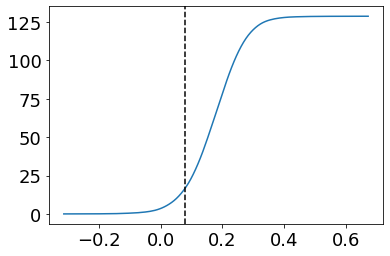

In [3]:
cumsum = np.cumsum(kde_df["y"])
plt.plot(kde_df["x"], cumsum)
plt.axvline(x=0.08, linestyle="--", c="black", label="Upper bound (0.08)")

In [38]:
np.percentile(cumsum, 10)

0.050746411112403925

In [4]:
best_idx = np.argmin(np.abs(kde_df["x"] - 0.08))
kde_df.iloc[best_idx]

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


x    0.082207
y    2.193577
Name: 51, dtype: float64

In [5]:
lower_sum = np.sum(kde_df.iloc[:best_idx]["y"])

In [6]:
upper_sum = np.sum(kde_df.iloc[best_idx:]["y"])

In [7]:
total_sum = lower_sum + upper_sum

In [8]:
lower_sum / total_sum, upper_sum / total_sum

(0.11946542795902419, 0.8805345720409758)

In [7]:
cumsum = np.cumsum(kde_df["y"])
np.percentile(cumsum, 11.8)


0.0702537722849902

In [4]:
grad = np.gradient(kde_df["y"])
print(np.max(grad))
print(np.min(grad))
idx = np.argmax(grad)
kde_df.iloc[idx]
kde_df.iloc[np.argmin(grad)]

0.29443786528380334
-0.2949752540474424


x    0.268503
y    2.726318
Name: 75, dtype: float64

In [72]:
fig, axes = plt.subplots(3, sharex=True)
axes[0].plot(kde_df["x"], kde_df["y"], label="")
axes[0].axvline(x=0.08, linestyle="--", c="black", label="Upper bound (0.08)")
axes[0].set_ylabel("KDE")
axes[0].legend(loc="upper right")
axes[1].plot(kde_df["x"], np.cumsum(kde_df["y"]), label="")
perc_10 = np.percentile(cumsum, 10)
axes[1].axvline(x=0.06, linestyle="--", c="black", label="10th percentile (0.06)")
axes[1].set_ylabel("CDF")
axes[1].legend(loc="upper right")
axes[2].plot(kde_df["x"], np.gradient(kde_df["y"]), label="")
axes[2].axvline(x=0.097732, linestyle="--", c="black", label="max. gradient (0.097732)")
axes[2].axvline(x=0.268503, linestyle="--", c="grey", label="min. gradient (0.268503)")
axes[2].set_ylabel("approx. Derivative")
axes[2].legend(loc="upper right")

plt.xlabel("Mainstreaminess")

Text(0.5, 0, 'Mainstreaminess')

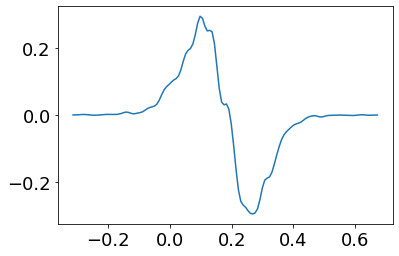

In [5]:
grad = np.gradient(kde_df["y"])
plt.plot(kde_df["x"], grad)

In [8]:
kde_df["x"][np.argmax(grad)]

0.09773175445817649

In [9]:
kde_df["x"][np.argmin(grad)]

0.2685027746410448

In [9]:
cumsum[np.argmax(grad)]

22.77508475770932

In [10]:
stats.percentileofscore(cumsum, kde_df["x"][np.argmax(grad)])

14.0625

In [8]:
%matplotlib qt

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(kde_df["x"], kde_df["y"] / len(kde_df), label="")
axes[0].set_ylabel("Density")
axes[0].grid(False)

axes[1].plot(kde_df["x"], grad)
axes[1].axhline(y=0, linestyle="--", c="grey")
axes[1].axvline(x=0.097732, linestyle="--", c="black", label="max. gradient (0.097732)")
#axes[1].axvline(x=0.268503, linestyle="dotted", c="black", label="min. gradient (0.268503)")
axes[1].set_ylabel("Gradient")
axes[1].grid(False)
plt.xlabel("Mainstreaminess")
plt.legend(loc="upper right")

In [37]:
kde_df["x"]

0     -0.313671
1     -0.305909
2     -0.298147
3     -0.290384
4     -0.282622
         ...   
123    0.641094
124    0.648856
125    0.656619
126    0.664381
127    0.672143
Name: x, Length: 128, dtype: float64

In [38]:
kde_df["y"]

0      0.000028
1      0.000130
2      0.000488
3      0.001331
4      0.002717
         ...   
123    0.001960
124    0.001115
125    0.000443
126    0.000123
127    0.000027
Name: y, Length: 128, dtype: float64

In [56]:
plt.plot(kde_df["y"], label="PDF")
plt.axvline(x=np.mean(np.cumsum(kde_df["y"])), label="Mean")
plt.axvline(x=np.median(np.cumsum(kde_df["y"])), label="Median")

In [71]:
normms = kde_df[kde_df["x"] > 0.097732]
plt.plot(normms["x"], normms["y"], label="PDF")

mean = np.mean(normms["x"] * normms["y"])
plt.axvline(x=mean, linestyle="--", color="black", label="Mean %f" % (mean))
plt.legend()